<a href="https://colab.research.google.com/github/amirgarsha/ann_MK/blob/main/MK_ann_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import matplotlib.pyplot as plt
import numpy as np


##Regression

In [3]:
## check dataset
california_housing = fetch_california_housing()

In [4]:
## split data
X_train0, X_test, y_train0,  y_test = train_test_split(california_housing["data"],
                                                    california_housing["target"])

In [5]:
## split train to train and validation
X_train1, X_validation, y_train1, y_validation = train_test_split(X_train0,
                                                                  y_train0)

In [6]:
## check shape of train and test
print(X_train1.shape)
print(X_test.shape)
print(X_validation.shape)

(11610, 8)
(5160, 8)
(3870, 8)


In [7]:
## Standardization
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train1)
X_validation_s = sc.transform(X_validation)
X_test_s = sc.transform(X_test)

Create Model

In [8]:
## create Model
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)]
)

In [9]:
model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [10]:
history = model.fit(X_train_s, y_train1, epochs=30, validation_data=(X_validation_s, y_validation))

Epoch 1/30
363/363 [==============================] - 5s 9ms/step - loss: 0.8354 - mean_absolute_error: 0.6283 - val_loss: 0.4831 - val_mean_absolute_error: 0.5152
Epoch 2/30
363/363 [==============================] - 2s 6ms/step - loss: 0.4897 - mean_absolute_error: 0.5037 - val_loss: 0.4813 - val_mean_absolute_error: 0.4823
Epoch 3/30
363/363 [==============================] - 2s 6ms/step - loss: 0.4622 - mean_absolute_error: 0.4814 - val_loss: 0.3975 - val_mean_absolute_error: 0.4514
Epoch 4/30
363/363 [==============================] - 2s 6ms/step - loss: 0.4310 - mean_absolute_error: 0.4677 - val_loss: 0.4002 - val_mean_absolute_error: 0.4633
Epoch 5/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4199 - mean_absolute_error: 0.4602 - val_loss: 0.3832 - val_mean_absolute_error: 0.4411
Epoch 6/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4074 - mean_absolute_error: 0.4527 - val_loss: 0.3659 - val_mean_absolute_error: 0.4367
Epoch 7/30
363/3

## Functional API

In [11]:
X_train0.shape[1:]

(8,)

In [17]:
input_layer = keras.layers.Input(shape=X_train1.shape[1:])
hidden_layer_1 = keras.layers.Dense(50, activation="relu")(input_layer)
hidden_layer_2 = keras.layers.Dense(10, activation="relu")(hidden_layer_1)
cancatenate_layer = keras.layers.Concatenate()([input_layer, hidden_layer_2])
output_layer = keras.layers.Dense(1)(cancatenate_layer)
model_conc = keras.Model(inputs=[input_layer], outputs=[output_layer])


In [18]:
model_conc.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_14 (Dense)            (None, 50)                   450       ['input_6[0][0]']             
                                                                                                  
 dense_15 (Dense)            (None, 10)                   510       ['dense_14[0][0]']            
                                                                                                  
 concatenate_4 (Concatenate  (None, 18)                   0         ['input_6[0][0]',             
 )                                                                   'dense_15[0][0]']        

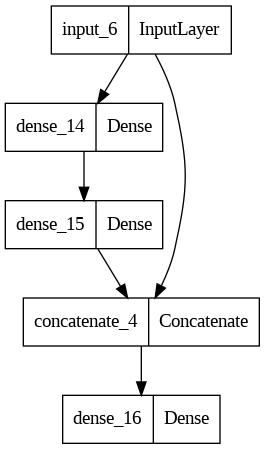

In [20]:
keras.utils.plot_model(model_conc, "model_pic.png")

In [21]:
model_conc.compile(loss="mean_squared_error",
                   optimizer="sgd",
                   metrics="mean_absolute_error")

In [23]:
model_conc.fit(X_train_s, y_train1, epochs = 30,
               validation_data = (X_validation_s, y_validation) )

Epoch 1/30
363/363 [==============================] - 5s 6ms/step - loss: 0.9870 - mean_absolute_error: 0.6488 - val_loss: 0.5013 - val_mean_absolute_error: 0.5234
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5113 - mean_absolute_error: 0.5175 - val_loss: 0.4397 - val_mean_absolute_error: 0.4878
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4698 - mean_absolute_error: 0.4911 - val_loss: 0.5364 - val_mean_absolute_error: 0.5020
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4472 - mean_absolute_error: 0.4781 - val_loss: 0.3994 - val_mean_absolute_error: 0.4579
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4266 - mean_absolute_error: 0.4666 - val_loss: 0.3875 - val_mean_absolute_error: 0.4528
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4190 - mean_absolute_error: 0.4599 - val_loss: 0.3743 - val_mean_absolute_error: 0.4420
Epoch 7/30
363/3

## funcitonal API with multiple input

In [24]:
X_train_s_1, X_train_s_2 = X_train_s[: , :6], X_train_s[: , -4:]
X_validation_s_1, X_validation_s_2 = X_validation_s[: , :6], X_validation_s[: , -4:]
X_test_s_1, X_test_s_2 = X_test_s[: , :6], X_test_s[: , -4:]

In [25]:
input_layer_1 = keras.layers.Input(shape=[6])
input_layer_2 = keras.layers.Input(shape=[4])
hidden_layer_1 = keras.layers.Dense(50, activation="relu")(input_layer_1)
hidden_layer_2 = keras.layers.Dense(10, activation="relu")(hidden_layer_1)
concatenation_layer = keras.layers.Concatenate()([input_layer_2, hidden_layer_2])
output_layer = keras.layers.Dense(1)(concatenation_layer)
model_multiple = keras.Model(inputs=[input_layer_1, input_layer_2], outputs=[output_layer])

In [26]:
model_multiple.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 dense_17 (Dense)            (None, 50)                   350       ['input_7[0][0]']             
                                                                                                  
 input_8 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 dense_18 (Dense)            (None, 10)                   510       ['dense_17[0][0]']            
                                                                                            

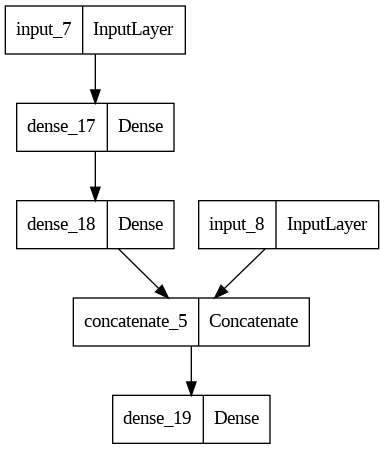

In [28]:
keras.utils.plot_model(model_multiple, "multiple_model.png")

In [29]:
model_multiple.compile(loss="mean_squared_error",
                       optimizer="sgd",
                       metrics="mean_absolute_error")

In [32]:
model_multiple.fit((X_train_s_1, X_train_s_2), y_train1, epochs = 30,
                   validation_data=((X_validation_s_1,X_validation_s_2), y_validation))

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 1.1182 - mean_absolute_error: 0.6895 - val_loss: 0.5272 - val_mean_absolute_error: 0.5365
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6011 - mean_absolute_error: 0.5373 - val_loss: 0.4526 - val_mean_absolute_error: 0.4975
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4825 - mean_absolute_error: 0.5048 - val_loss: 0.4329 - val_mean_absolute_error: 0.4817
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4540 - mean_absolute_error: 0.4886 - val_loss: 0.4023 - val_mean_absolute_error: 0.4554
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4571 - mean_absolute_error: 0.4835 - val_loss: 0.4217 - val_mean_absolute_error: 0.4898
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4241 - mean_absolute_error: 0.4702 - val_loss: 0.3744 - val_mean_absolute_error: 0.4452
Epoch 7/30
363/3